In [0]:
#Mounting The Google drive
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls

In [0]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [0]:
import numpy as np 
import cv2
import os
import shutil

#for plotting the metrics 
import matplotlib.pyplot as plt

# For real time data augmentation
from keras.preprocessing.image import ImageDataGenerator

#For developing the deep learning model
from keras.applications.vgg19 import VGG19, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop


Using TensorFlow backend.


In [0]:
#make dirctories in which the images should be divided
!mkdir TRAIN TEST VAL TRAIN/yes TRAIN/no TEST/yes TEST/no VAL/yes VAL/no

In [0]:
from os import listdir
img_path ='brain_tumor_dataset/'
# split the data by train/val/test
for File in listdir(img_path):
    
        img_num = len(listdir(img_path + File))
        for (n, File_name) in enumerate(listdir(img_path + File)):
            img = img_path + File + '/' + File_name
            if n < 8:
                shutil.copy(img, 'TEST/' + File + '/' + File_name)
            elif n < 0.8*img_num:
                shutil.copy(img, 'TRAIN/'+ File + '/' + File_name)
            else:
                shutil.copy(img, 'VAL/'+ File + '/' + File_name)

In [0]:
# for dealing with '.h5' models
!pip install --user cython h5py

In [0]:
!pip install --user git+https://github.com/Theano/Theano.git

  Cloning https://github.com/Theano/Theano.git to /tmp/pip-req-build-z1p7m0p_
  Running command git clone -q https://github.com/Theano/Theano.git /tmp/pip-req-build-z1p7m0p_
  Created wheel for Theano: filename=Theano-1.0.4+51.gf1e4ec47c-cp36-none-any.whl size=2667983 sha256=38a01e515571a97c3dd59507e467155337a048f07a48064c346903b4fc2d53e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-cxo61bfd/wheels/14/72/17/35fc1366380e8e05fc8ed5d44e24a2da28ef975aa4be6aaa17
Successfully built Theano
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [0]:

!pip install --user git+https://github.com/fchollet/keras.git

  Cloning https://github.com/fchollet/keras.git to /tmp/pip-req-build-1zada3oo
  Running command git clone -q https://github.com/fchollet/keras.git /tmp/pip-req-build-1zada3oo
  Created wheel for Keras: filename=Keras-2.3.1-cp36-none-any.whl size=365124 sha256=3b69f2bcc7c66a082734e5425d5849e53216a386ed4faa49212e45e133ebbaba
  Stored in directory: /tmp/pip-ephem-wheel-cache-hilc67ze/wheels/9b/28/23/374425566fc615b7eeb7d748899ed3ce8d72851e4b5d22cc83
Successfully built Keras


*VGG_19*

In [0]:
# input size for a vgg19 model
IMG_SIZE=[224,224]

In [0]:

vgg_19_model = VGG19(input_shape= IMG_SIZE+[3],weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [0]:
from keras.layers import GlobalMaxPooling2D
x = vgg_19_model.output
x

<tf.Tensor 'block5_pool/MaxPool:0' shape=(None, 7, 7, 512) dtype=float32>

In [0]:
x = GlobalMaxPooling2D()(x)

In [0]:
from keras.layers import Dense
x = Dense(512,activation = 'relu')(x)
x = Dense(512,activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)

In [0]:
predictions = Dense(2,activation='softmax')(x)

In [0]:
Vgg_19 = Model(inputs = vgg_19_model.input, outputs = predictions)
Vgg_19.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
for layer in vgg_19_model.layers:
   layer.trainable = False

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [0]:
train_generator = train_datagen.flow_from_directory('TRAIN', target_size=(224,224), color_mode='rgb', batch_size=32, class_mode='categorical',shuffle = False)


Found 187 images belonging to 2 classes.


In [0]:
val_generator = val_datagen.flow_from_directory('VAL', target_size=(224,224), color_mode='rgb', batch_size=10, class_mode='categorical',shuffle = False)


Found 50 images belonging to 2 classes.


In [0]:
# Compile the model
Vgg_19.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [0]:
print('total images to be trained ',train_generator.n)

total images to be trained  187


In [0]:
print('batch size set', train_generator.batch_size)

batch size set 32


In [0]:
print('no of steps per epoch', train_generator.n//train_generator.batch_size)
#print(val_generator.n//val_generator.batch_size)

no of steps per epoch 5


In [0]:
vgg19_fit_model = Vgg_19.fit_generator(train_generator, steps_per_epoch=6,epochs = 20,validation_data=val_generator,validation_steps=5)

Epoch 1/20
6/6 [==============================] - 155s 26s/step - loss: 6.8586 - accuracy: 0.7861 - val_loss: 0.0000e+00 - val_accuracy: 0.6200
Epoch 2/20
6/6 [==============================] - 149s 25s/step - loss: 10.9378 - accuracy: 0.3529 - val_loss: 1.8856 - val_accuracy: 0.6200
Epoch 3/20
6/6 [==============================] - 153s 25s/step - loss: 3.0289 - accuracy: 0.6150 - val_loss: 0.2771 - val_accuracy: 0.7600
Epoch 4/20
6/6 [==============================] - 149s 25s/step - loss: 1.6872 - accuracy: 0.6524 - val_loss: 0.0043 - val_accuracy: 0.7600
Epoch 5/20
6/6 [==============================] - 153s 25s/step - loss: 2.5532 - accuracy: 0.6791 - val_loss: 6.8226e-04 - val_accuracy: 0.7800
Epoch 6/20
6/6 [==============================] - 149s 25s/step - loss: 1.9925 - accuracy: 0.5348 - val_loss: 1.4726 - val_accuracy: 0.7200
Epoch 7/20
6/6 [==============================] - 153s 25s/step - loss: 0.7565 - accuracy: 0.7807 - val_loss: 0.0062 - val_accuracy: 0.7600
Epoch 8/20


In [0]:
print(vgg19_fit_model.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


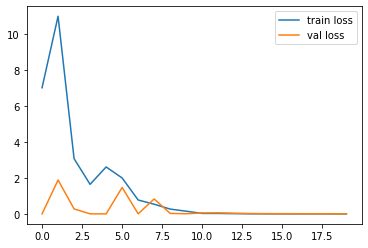

In [0]:
plt.plot(vgg19_fit_model.history['loss'], label='train loss')
plt.plot(vgg19_fit_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()


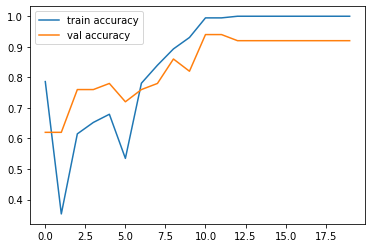

In [0]:
plt.plot(vgg19_fit_model.history['accuracy'], label='train accuracy')
plt.plot(vgg19_fit_model.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


In [0]:
Vgg_19.save('brain_tumour_classifier.h5')

In [0]:
from keras.preprocessing import image
from keras.models import load_model

In [0]:
Vgg_19 = load_model('brain_tumour_classifier.h5')

In [0]:
test_generator = test_datagen.flow_from_directory('TEST', target_size=(224,224), color_mode='rgb', batch_size=1, class_mode='categorical',shuffle = False)

Found 16 images belonging to 2 classes.


In [0]:
result = Vgg_19.evaluate_generator(test_generator, steps=16)
print(result)

[0.0, 0.8125]
